<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1195]:
#pip install plotly

In [1196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [1197]:
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep =';')

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [1198]:
data.sample(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
6483,"Мужчина , 35 лет , родился 12 сентября 1983",150000 руб.,Мастер по ремонту iphone,"Одинцово , готов к переезду , готов к командир...","частичная занятость, полная занятость","гибкий график, полный день, сменный график, уд...",Опыт работы 20 лет 8 месяцев Октябрь 1998 — п...,Радиорырок,Инженер,Среднее специальное образование 2000 Ккрп Ради...,12.04.2019 03:07,Не указано
31605,"Мужчина , 29 лет , родился 6 июня 1989",80000 руб.,"Инженер / мастер по ремонту техники Apple,Sams...","Москва , м. Выхино , не готов к переезду , го...",полная занятость,полный день,Опыт работы 6 лет 7 месяцев Октябрь 2018 — Ап...,Russia Mobile,"Мастер по ремонту техники Apple, Samsung и тд",Среднее специальное образование 2009 ФГОУСПО К...,07.05.2019 18:56,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

In [1199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений

In [1200]:
data.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [1201]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [1202]:
def education_cat(education):
    word_list = ['высшее','специальное']
    education_list = education.split(' ')
    education_type = education_list[0]
    if education_list[1] in word_list:
        education_type = education_list[0:2]
        education_type = ' '.join(education_type)
    return education_type             

In [1203]:
data['Образование'] = data['Образование и ВУЗ'].apply(education_cat)
data = data.drop('Образование и ВУЗ',axis = 1)
print(data['Образование'].unique())
print(data['Образование'].value_counts())

['Неоконченное высшее' 'Высшее' 'Среднее специальное' 'Среднее']
Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [1204]:
data['Пол'] = data['Пол, возраст'].apply(lambda x: 'М' if x[0][0] == 'М' else 'Ж')
data['Пол'].unique()

array(['М', 'Ж'], dtype=object)

In [1205]:
data['Возраст'] = data['Пол, возраст'].apply(lambda x: x.split(',')[1][2:4])
data['Возраст'].unique()

array(['39', '60', '36', '38', '26', '29', '46', '34', '35', '59', '27',
       '21', '31', '37', '30', '33', '42', '32', '23', '28', '25', '24',
       '43', '53', '49', '44', '48', '54', '22', '20', '40', '62', '72',
       '45', '41', '61', '50', '58', '57', '52', '56', '18', '19', '51',
       '16', '47', '71', '63', '55', '64', '68', '17', '73', '66', '65',
       '77', '67', '69', '76', '70', '14', '15', '10'], dtype=object)

In [1206]:
data = data.drop('Пол, возраст',axis =1)

Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых

In [1207]:
round(data['Пол'].value_counts(normalize=True)*100,2)

М    80.93
Ж    19.07
Name: Пол, dtype: float64

Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [1208]:
data['Возраст'] = data['Возраст'].astype('int')
round(data['Возраст'].mean(),2)

32.19

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [1209]:
#определила доступ к данным:
int(data['Опыт работы'][0].split(' ')[2:6][0])*int(data['Опыт работы'][0].split(' ')[2:6][2])

160

In [1210]:
# Опыт работы

def get_experience(arg):
    if arg is np.nan:
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
    


In [1211]:
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)
data = data.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [1212]:
def city(df):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань',
                  'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    df_ = df.split(' , ')[0]
    if 'Москва' in df_:
        return 'Москва'
    elif 'Санкт-Петербург' in df_:
        return 'Санкт-Петербург'
    elif df_ in million_cities:
        return 'город миллионник'
    else:
        return 'другие'

In [1213]:
data['Город'] = data['Город, переезд, командировки'].apply(city)

In [1214]:
data['Город'].value_counts()

Москва              16621
другие              15854
город миллионник     7332
Санкт-Петербург      4937
Name: Город, dtype: int64

    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …

In [1215]:
def relocation(df):
    df_ = df.split(' , ')[1]
    if 'м.' in df_:
        df_ = df.split(' , ')[2]
    if 'не ' in df_:
        return 'False'        
    else:
        return 'True'
    
    

In [1216]:
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(relocation)

In [1217]:
data['Готовность к переезду'].value_counts()

False    28719
True     16025
Name: Готовность к переезду, dtype: int64


* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.

In [1218]:
def trip(df):
    df_ = df.split(' , ')[-1]
    if 'не ' in df_:
        return 'False'        
    else:
        return 'True'

In [1219]:
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(trip)

Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.

In [1220]:
round((data['Город'].value_counts(normalize=True))*100)

Москва              37.0
другие              35.0
город миллионник    16.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [1221]:
ready_to_go =  data[(data['Готовность к переезду'] == 'True')& (data['Готовность к командировкам'] == 'True')].shape[0]

In [1222]:
round((ready_to_go/data.shape[0])*100)

32

In [1223]:
data = data.drop('Город, переезд, командировки',axis=1)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [1224]:
def busy_OHE_full(df):
    if 'полная занятость' in df:
        return 'True'
    else:
        return 'False'

In [1225]:
data['Полная занятость'] = data['Занятость'].apply(busy_OHE_full)
data['Частичная занятость'] = data['Занятость'].apply(lambda x: 'True' if 'частичная занятость' in x else False)
data['Проектная работа'] = data['Занятость'].apply(lambda x: 'True' if 'проектная работа' in x else False)
data['Стажировка'] = data['Занятость'].apply(lambda x: 'True' if 'стажировка' in x else False)
data['Волонтерство'] = data['Занятость'].apply(lambda x: 'True' if 'волонтерство' in x else False)

In [1226]:
data = data.drop('Занятость',axis = 1)

In [1227]:
data.head(3)

,ЗП,Ищет работу на должность:,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство
0,29000 руб.,Системный администратор,"гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,False,False,True,True,True,False,False
1,40000 руб.,Технический писатель,"гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,другие,False,True,True,True,True,False,False
2,20000 руб.,Оператор,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,False,False,True,False,False,False,False


In [1228]:
data['Полный день'] = data['График'].apply(lambda x: 'True' if 'полный день' in x else False)
data['Вахтовый метод'] = data['График'].apply(lambda x: 'True' if 'вахтовый метод' in x else False)
data['Удаленная работа'] = data['График'].apply(lambda x: 'True' if 'удаленная работа' in x else False)
data['Сменный график'] = data['График'].apply(lambda x: 'True' if 'сменный график' in x else False)
data['Гибкий график'] = data['График'].apply(lambda x: 'True' if 'гибкий график' in x else False)

In [1229]:
data = data.drop('График', axis=1)

In [1230]:
data.head(2)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Вахтовый метод,Удаленная работа,Сменный график,Гибкий график
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,...,True,True,True,False,False,True,False,True,True,True


Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?

In [1231]:
data[(data['Проектная работа'] == 'True') & (data['Волонтерство'] == 'True')].shape[0]

436

Сколько людей хотят работать вахтовым методом или с гибким графиком (в обоих столбцах стоит True)?

In [1232]:
data[(data['Вахтовый метод'] == 'True') & (data['Гибкий график'] == 'True')].shape[0]

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [1233]:
course = pd.read_csv('ExchangeRates.csv')
course.head(2)

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1


In [1234]:
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date
course['date'] = pd.to_datetime(course['date']).dt.date


In [1235]:
def ISO(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]

In [1236]:
data['Валюта'] = data['ЗП'].apply(ISO)
data['Валюта'].value_counts()

RUB    42471
KZT     1108
USD      628
BYN      329
EUR      106
UAH       73
UZS       20
KGS        6
AZN        3
Name: Валюта, dtype: int64

In [1237]:
merged = data.merge(right = course,left_on = ['Обновление резюме','Валюта'], right_on = ['date','currency'],how = 'left')

In [1238]:
merged['close'] = merged['close'].fillna('1')
merged['proportion'] = merged['proportion'].fillna('1')

*проверка на соответствие количества псутых значений в строках с рублями я сделала,вывод-все пропуски принадлежат строкам с рублями,поэтому я заполнила все  пустые значения-единицами

In [1239]:
merged['ЗП(значение)']  = merged['ЗП'].apply(lambda x: x.split(' ')[0])

In [1240]:
merged['ЗП(значение)'].shape[0]

44744

In [1241]:
merged['proportion'] = merged['proportion'].astype('float')
merged['close'] = merged['close'].astype('float')
merged['ЗП(значение)'] = merged['ЗП(значение)'].astype('float')

In [1242]:
merged['ЗП(руб)'] = merged['ЗП(значение)']*merged['close']/merged['proportion']

In [1243]:
merged['ЗП(руб)'].head()

0     29000.0
1     40000.0
2     20000.0
3    100000.0
4    140000.0
Name: ЗП(руб), dtype: float64

Чему равна медианная заработная плата соискателей в нашей таблице (в рублях)? В ответе укажите целое число тысяч.

In [1244]:
round(merged['ЗП(руб)'].median()/1000)

59

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

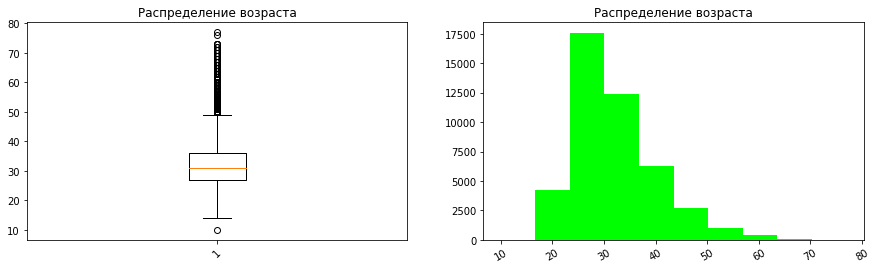

In [1245]:


#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#столбчатая диаграмма
axes[0].boxplot(x=merged['Возраст'])
axes[0].set_title('Распределение возраста')
axes[0].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[1].hist(x=merged['Возраст'],
             label=['Возраст'], 
             color='lime')
axes[1].set_title('Распределение возраста');
axes[1].xaxis.set_tick_params(rotation=30)

Мода распределения признака 'Возраст' = 30 лет, предельные значения (17,79),большинство соискателей находятся в возрасте от 17 до 50 лет, выбросы видны на boxplot - один в области 12 лет,другие - в области 78-79 лет

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

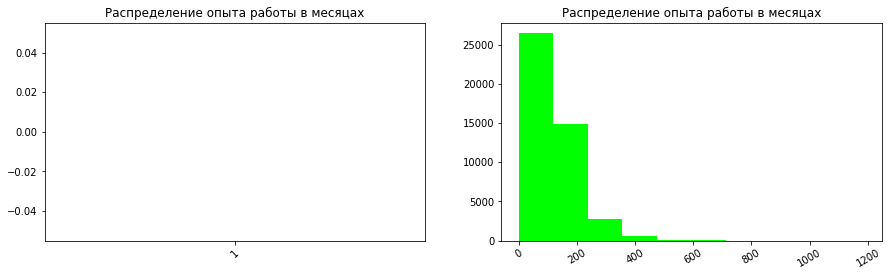

In [1246]:


#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#столбчатая диаграмма
axes[0].boxplot(x=data['Опыт работы (месяц)'])
axes[0].set_title('Распределение опыта работы в месяцах')
axes[0].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[1].hist(x=data['Опыт работы (месяц)'],
             label=['Опыт работы в месяцах'], 
             color='lime')
axes[1].set_title('Распределение опыта работы в месяцах');
axes[1].xaxis.set_tick_params(rotation=30)

Мода распределения = 78 лет, предельные значения -(0,1200),опыт большинства соискателей находится в диапазоне от 0 до 390 месяцев, очевидный выброс около 1200 месяцев

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


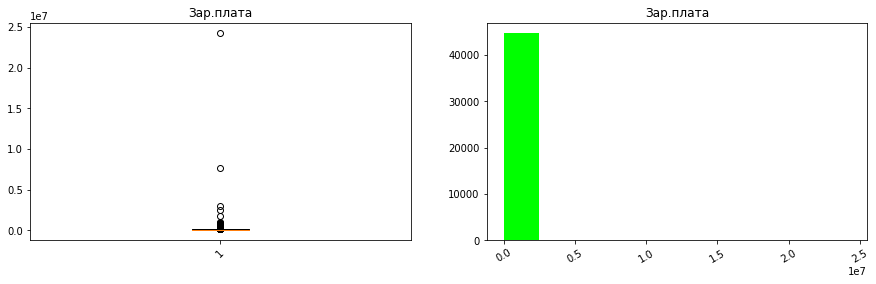

In [1247]:
#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#столбчатая диаграмма
axes[0].boxplot(x=merged['ЗП(руб)'])
axes[0].set_title('Зар.плата')
axes[0].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[1].hist(x=merged['ЗП(руб)'],
             label=['ЗП'], 
             color='lime')
axes[1].set_title('Зар.плата');
axes[1].xaxis.set_tick_params(rotation=30)

Большинство соискателей претендуют на зарплату 50 тыс.руб, однако некоторые указывают желаемую зарплату как 0 руб, поэтому распределение находится в диапазоне от 0 до 25млн.руб,верхнее значение является выбросом,если не учитывать его,то верхняя граница распределения находится примерно в 400 тыс.руб. Еще один выброс примерно в 800тыс.руб. 

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [1248]:
df = merged[merged['ЗП(руб)'] < 1000000]
df = df.groupby('Образование')['ЗП(руб)'].median()
df = pd.DataFrame(df)
df.columns

Index(['ЗП(руб)'], dtype='object')

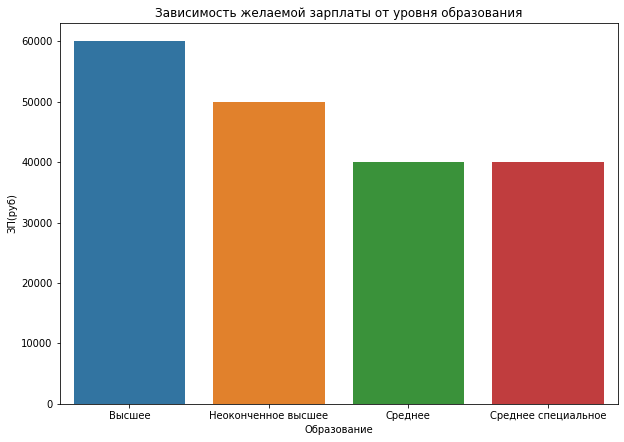

In [1249]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=df,
    x=df.index,
    y='ЗП(руб)'
)
barplot.set_title('Зависимость желаемой зарплаты от уровня образования');

Желаемая заработная плата коррелирует с уровнем образования, а следовательно, это важный признак для прогнозирования .
Однако,интересно, насколько не соответсвует желаемый уровень зарплаты - реальным,даже с двумя высшими образованиями, в регионах уровень ниже,чем люди хотят со средним специальным образованием, к сожалению.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [1250]:
df = merged[merged['ЗП(руб)'] < 1000000]

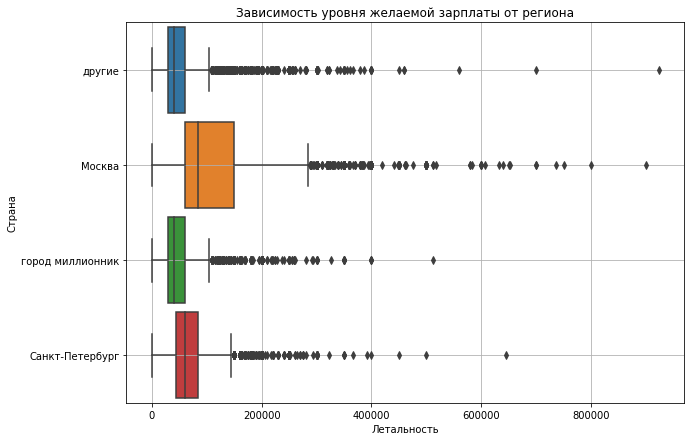

In [1251]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y=df['Город'],
    x='ЗП(руб)',
    orient='h',
    width=0.9
)
boxplot.set_title('Зависимость уровня желаемой зарплаты от региона');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()



Из диаграммы видно, что самая высокая медианная зарплата в г.Москве, как и размах,затем Санкт-Петербург, на третьем месте -города миллионники и другие города,причем внутри этой группы различий в медиане нет,как и в размахе,медиана составляет около 40.000руб.
Считаю,что регион является важным признаком для прогнозирования, я бы сделала более мелкое разделение внутри 'других' отделив областные центры от малых городов области.


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

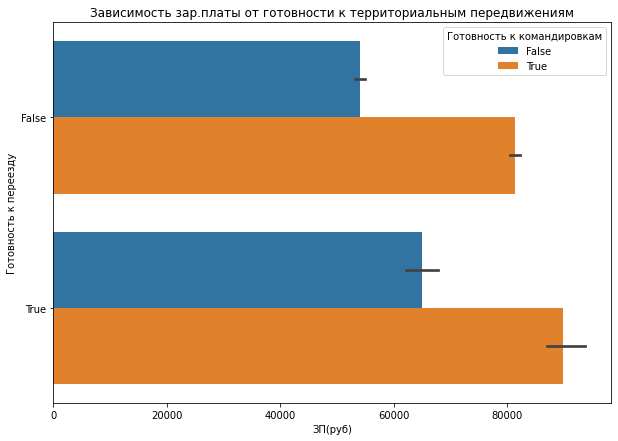

In [1252]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=merged,
    x='ЗП(руб)',
    y='Готовность к переезду',
    hue='Готовность к командировкам'
)
barplot.set_title('Зависимость зар.платы от готовности к территориальным передвижениям');

Самая высокая ожидаемая зарплата у тех,кто готов к переездам и командировкам.
Затем у тех,кто к переездам не готов,но готов к командировкам.
Затем у тех,кто готов к переезду,но не готов к командировкам. 
Ну и сама низкая у тех,кто двигаться не хочет(или не может)

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [1253]:
pivot = merged.pivot_table(values = 'ЗП(руб)',
                   index = 'Возраст',
                   columns= 'Образование',
                   aggfunc= 'median',
                   fill_value= 0)

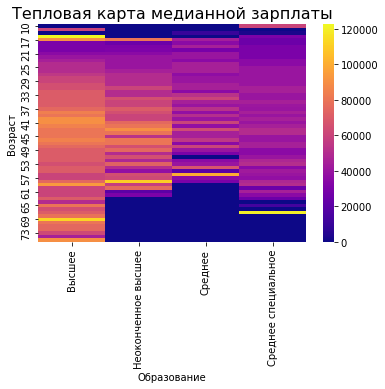

In [1254]:
heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта медианной зарплаты', fontsize=16);

Тепловая карта подтверждает выводы,сделанные выше по другим графикам,
 люди со средним и средним специальным образованием хотя зарплату чуть ниже,чем люди с неоконченным высшим.
 Люди с высшим образованием претендуют на более высокую зарплату, есть выбросы- в группе людей со средним специальным образованием кто-то хочет зарплату в 120.000,и в группе с высшим образованием кто-то хочет зарплату в 120.000 в 17 лет.
Наблюдается тенденция -чем больше возраст ( в пределах трудового возраста),тем выше зарплата . После наступления пенсионного возраста - в группах  без высшего образования наблюдается снижение уровня запрашиваемых зарплат, а вот 
люди с высшим образование сохраняют тенденцию к увеличению з/пл даже с наступлением пенсионного возраста.


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [1255]:
import matplotlib.lines as mlines

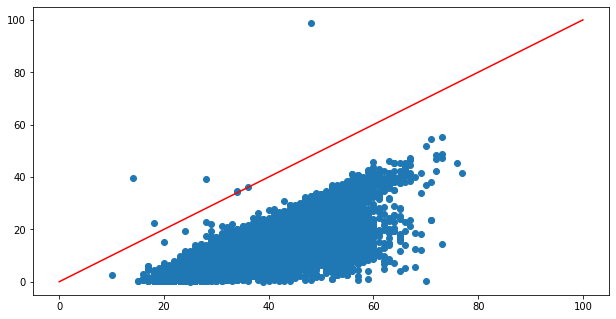

In [1256]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    y=data['Опыт работы (месяц)']/12, 
    x=merged['Возраст']
);
line = mlines.Line2D([0, 100], [0, 100], color='red')
axes.add_line(line)

Видно,что выбросов относительно немного .

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [1257]:
df = merged.loc[:,'Полная занятость':'Гибкий график']

In [1258]:
df[(df.values == 'True')] = 1
df[(df.values == True)] = 1
df[(df.values == False)] = 0
df[(df.values == 'False')] = 0

In [1259]:
new_df = pd.DataFrame([['Полная занятость', 43284], ['Частичная занятость', 13136],
                       ['Проектная работа', 8068],['Стажировка',2804],
                       ['Волонтерство',486],['Полный день',41716],['Вахтовый метод',3084],
                        ['Удаленная работа',15022], ['Сменный график',12725], ['Гибкий график',15584]])

In [1260]:
new_df['Процент'] = round(new_df[1]/df.shape[0]*100)
new_df = new_df.sort_values(by='Процент', ascending= False)

In [1261]:
df_sced = new_df.iloc[0:5,:]
df_sced = df_sced.sort_values(by='Процент', ascending= False)

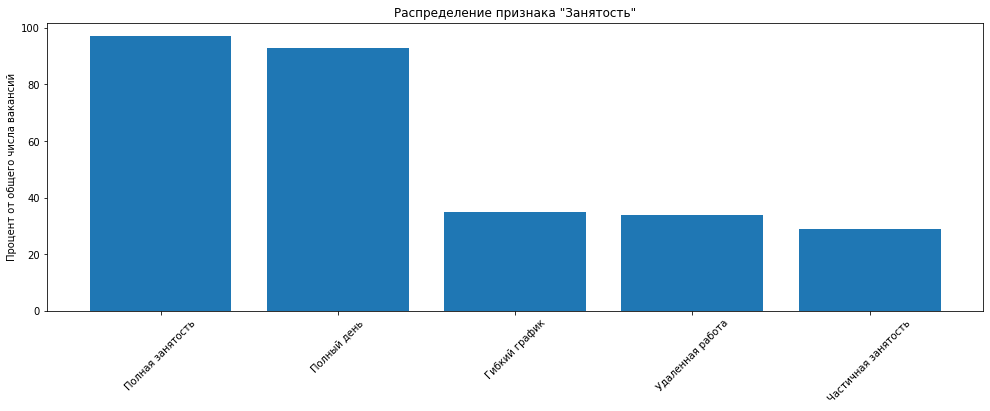

In [1262]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = df_sced[0],
    height = df_sced['Процент'],
    );
main_axes.set_ylabel('Процент от общего числа вакансий')
main_axes.set_title('Распределение признака "Занятость"')
main_axes.xaxis.set_tick_params(rotation=45)

Из распределения видно,что большинство соискателей претендуют на полный день,полная занятость. Меньше 40% хотят удаленную работу, гибкий график или частичную занятость.

In [1263]:
df_work_time = new_df.iloc[6:,:]
df_work_time = df_work_time.sort_values(by='Процент', ascending= False)

In [1264]:
df_work_time

,0,1,Процент
2,Проектная работа,8068,18.0
6,Вахтовый метод,3084,7.0
3,Стажировка,2804,6.0
4,Волонтерство,486,1.0


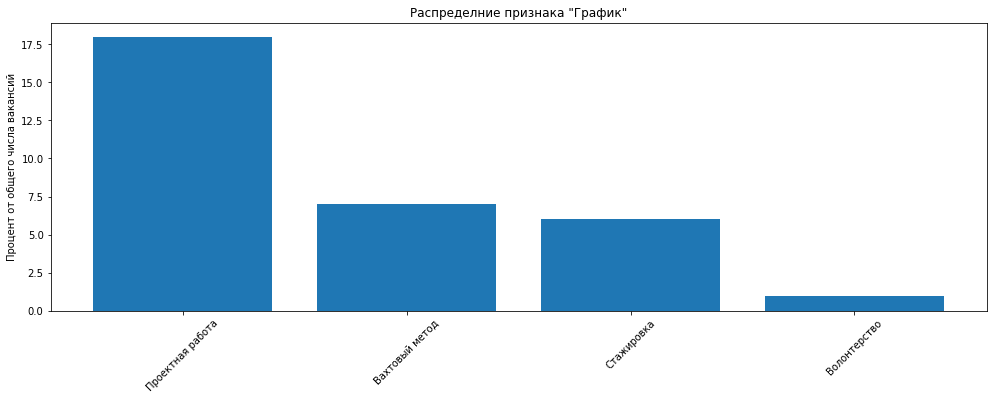

In [1265]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = df_work_time[0],
    height = df_work_time['Процент'],
    );
main_axes.set_ylabel('Процент от общего числа вакансий')
main_axes.set_title('Распределние признака "График"')
main_axes.xaxis.set_tick_params(rotation=45)

Большинство согласно на проектную работу,а вот вахты, стажировки, а также волонтерство  - хотят гораздо меньшее число людей.

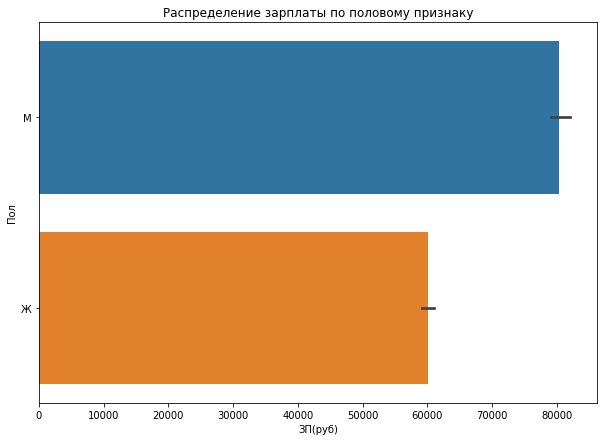

In [1266]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=merged,
    x='ЗП(руб)',
    y='Пол'
)
barplot.set_title('Распределение зарплаты по половому признаку');

Из данной диаграммы видно,что женщины ожидают зарплату на порядок ниже ,чем мужчины.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [1267]:
hh_database_preprocessed = pd.read_csv('hh_database_preprocessed.csv')

In [1268]:
hh_database_preprocessed = hh_database_preprocessed.drop_duplicates()
hh_database_preprocessed.shape[0]

44583

In [1269]:
mask = merged.duplicated(subset=merged.columns)
hh_dupl = merged[mask]
hh_dupl.shape[0]

161

In [1270]:
hh_ = merged.drop_duplicates()
print(hh_.shape[0])

44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [1271]:
hh_.isnull().sum()

ЗП                                     0
Ищет работу на должность:              0
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Обновление резюме                      0
Авто                                   0
Образование                            0
Пол                                    0
Возраст                                0
Опыт работы (месяц)                  166
Город                                  0
Готовность к переезду                  0
Готовность к командировкам             0
Полная занятость                       0
Частичная занятость                    0
Проектная работа                       0
Стажировка                             0
Волонтерство                           0
Полный день                            0
Вахтовый метод                         0
Удаленная работа                       0
Сменный график                         0
Гибкий график                          0
Валюта                                 0
currency        

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [1272]:
hh_['Опыт работы (месяц)'].median()

100.0

In [1273]:
hh_ = hh_.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())

Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до сотых.

In [1274]:
hh_['Опыт работы (месяц)'].mean()

114.35328951795609

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [1283]:
hh_itog = hh_[(hh_['ЗП(руб)'] < 1000000) & (hh_['ЗП(руб)'] > 1000)]

In [1285]:
hh_itog = hh_[(hh_['ЗП(руб)'] <= 1000000) & (hh_['ЗП(руб)'] >=1000)]

Сколько выбросов вы нашли?

In [1286]:
hh_.shape[0] -hh_itog.shape[0]

89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [1287]:
hh_old = hh_itog[(hh_itog['Опыт работы (месяц)']/12) > hh_itog['Возраст']]

In [1288]:
hh_old.shape[0]

7

In [1289]:
hh_old_itog = hh_itog[(hh_itog['Опыт работы (месяц)']/12) < hh_itog['Возраст']]

In [1290]:
hh_old_itog.shape[0]

44485

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

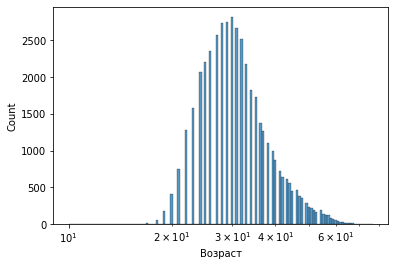

In [1291]:
sns_plot = sns.histplot(hh_old_itog['Возраст'], log_scale= True )
fig = sns_plot.get_figure()

In [1292]:
hh_old_itog.shape[0]

44485

In [1293]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [1294]:
outliers, cleaned = outliers_z_score(hh_old_itog,'Возраст',True)

In [1295]:
outliers.shape[0]

3

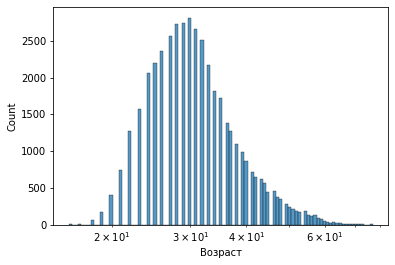

In [1296]:
sns_plot = sns.histplot(cleaned['Возраст'], log_scale= True )
fig = sns_plot.get_figure()